# TOI 519.01 TESS light curve analysis

**Hannu Parviainen**

**Last changed: 16.3.2020**

Here we carry out an initial TESS light curve analysis. We allow for unconstrained flux contamination to see how much a single-colour light curve can constrain it.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytransit.lpf.tess.ctesslpf import CTESSLPF
%run toi_519.py

In [10]:
lpf = CTESSLPF('toi_519_tess_cnt', tess_file, zero_epoch=zero_epoch.n, period=period.n, bldur=0.15)

In [11]:
lpf.set_prior('zero_epoch', 'NP', zero_epoch.n, 3 * zero_epoch.s)
lpf.set_prior('period', 'NP', period.n, 3 * period.s)
lpf.set_prior('k2_true', 'UP', 0.1 ** 2, 0.75 ** 2)

In [12]:
lpf.ps

[  0 |G| tc             N(μ = 2458491.877197, σ = 0.0012330000000000002) [    -inf ..      inf],
   1 |G| p              N(μ = 1.265223, σ = 0.000108)            [    0.00 ..      inf],
   2 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |P| k2_true        U(a = 0.010000000000000002, b = 0.5625)  [    0.01 ..     0.56],
   5 |P| k2_app         U(a = 0.010000000000000002, b = 0.25)    [    0.01 ..     0.25],
   6 |P| q1_TESS        U(a = 0, b = 1)                          [    0.00 ..     1.00],
   7 |P| q2_TESS        U(a = 0, b = 1)                          [    0.00 ..     1.00],
   8 |L| gp_ln_out      N(μ = -6.0, σ = 1.5)                     [    -inf ..      inf],
   9 |L| gp_ln_in       U(a = -8, b = 8)                         [    -inf ..      inf],
  10 |L| gp_log10_wn    N(μ = -1.4579334384291815, σ = 0.025)    [    -inf ..      inf]]

In [ ]:
lpf.optimize_global(niter=150, npop=30)

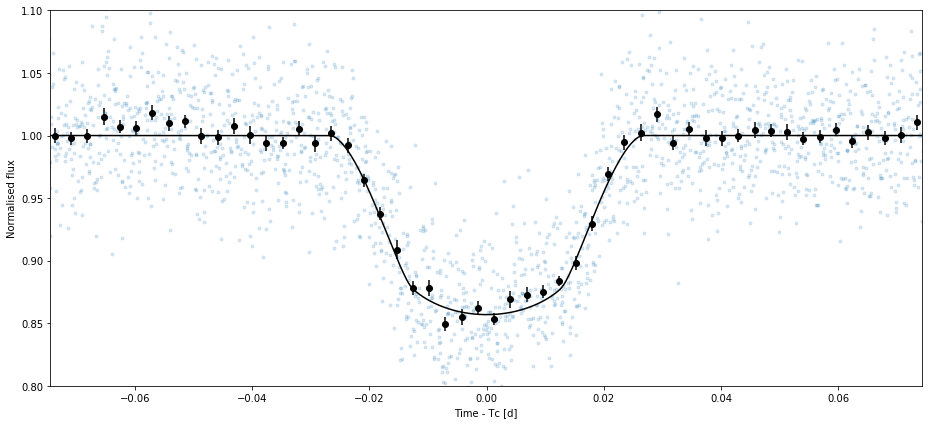

In [7]:
lpf.plot_folded_transit(ylim=(0.8,1.1), binwidth=4)

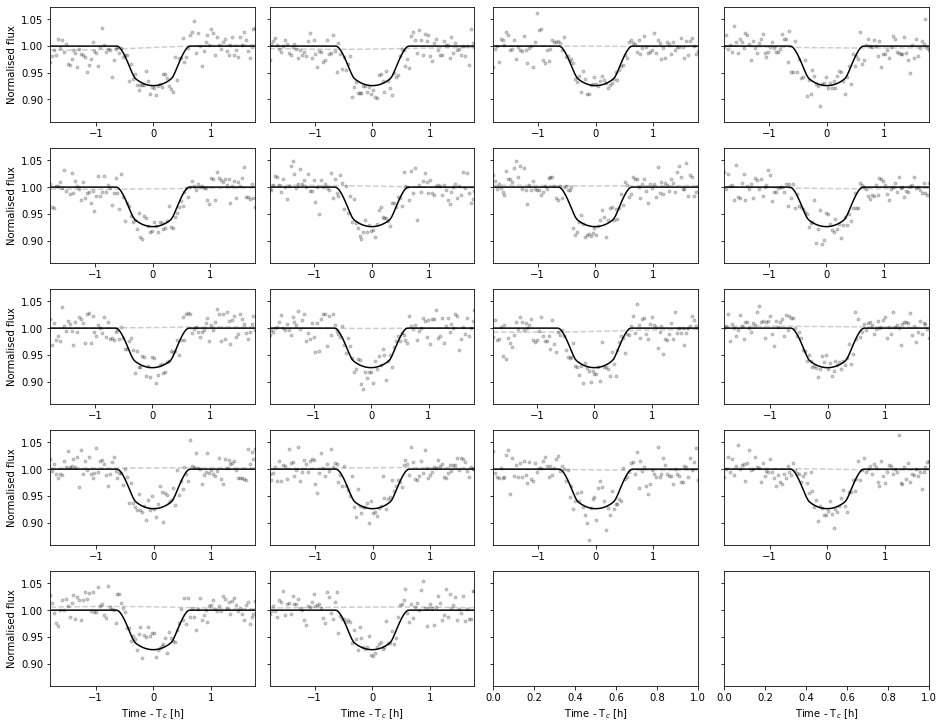

In [14]:
lpf.plot_individual_transits(ncols=4, figsize=(13,10));

In [15]:
lpf.sample_mcmc(500, repeats=15)

In [16]:
df = lpf.posterior_samples()

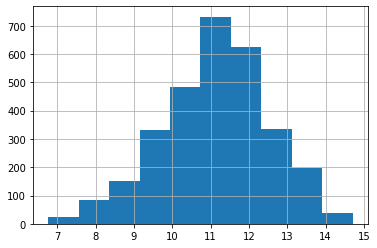

In [17]:
df.rho.hist()

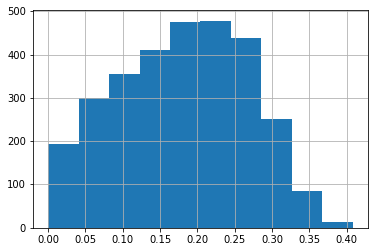

In [45]:
(1 - df.k_app / df.k_true).hist()

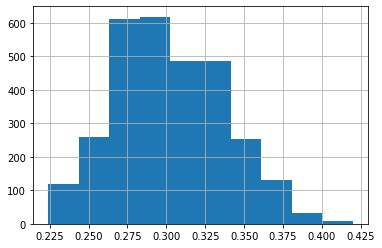

In [46]:
df.k_true.hist()

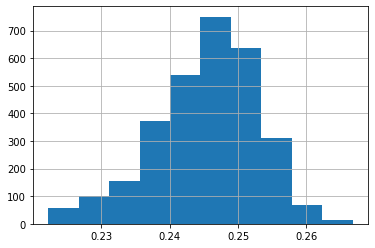

In [47]:
df.k_app.hist()

In [16]:
lpf.save()

---

<center> © 2020 Hannu Parviainen </center>